In [1]:
%matplotlib inline
from ecell4 import *
import numpy as np
import math
import time
import matplotlib.pylab as plt
from ecell4.lattice import LatticeWorld as world_type, LatticeSimulator as simulator_type
start_time=time.time()

In [2]:
length=1e-6
Dc=1e-12 #diffusion constant
voxels="5e-9"# voxel radius size
radius="5e-9"# radius of the species
vm= (4.0/3.0) * math.pi * float(radius)**3 #volume of each molecule
phi=0.1 #crowder volume fraction
Na=500 #number of molec A
intvl=1e-5 #observation interval (smaller than td)
simdrtn=1e-1 #simulation duration

w = world_type(Real3(length,length,length),float(voxels))
Vt= w.volume() #total volume
Nc=Vt*phi/vm #number of crowder
phiA=Na*vm/Vt#volume fraction of molec A
nump=round((simdrtn/intvl)+1) #number of points/steps
print('phiA=%f' %(phiA))
td=(2*float(radius))**2/(6*Dc)#t=2rv^2/3D
print('td=%s' %td)
print('total voxels=%i' %(w.col_size()*w.layer_size()*w.row_size()))


phiA=0.000262
td=1.66666666667e-05
total voxels=1403000


In [3]:
m = NetworkModel()
m.add_species_attribute(Species("A", radius, str(Dc)))
m.add_species_attribute(Species("B", radius, "0"))
#estimated time for the next diffusion walk to neighboring voxel

w.bind_to(m)
w.add_molecules(Species("A"), Na)
w.add_molecules(Species("B"), Nc)

print 'num of A= %i' %Na
print 'num of crowder= %i' %Nc
print 'fraction of crowder= %f' %phi

num of A= 500
num of crowder= 190985
fraction of crowder= 0.100000


In [31]:
#viz.plot_world(w)

In [32]:
pids = [pid for pid, p in w.list_particles(Species("A"))] #particle IDs
sim = simulator_type(m, w)
obs = FixedIntervalTrajectoryObserver(intvl, pids) #log the particle' position
sim.run(simdrtn, obs)#run simulation

In [33]:
#viz.plot_trajectory(obs)

In [34]:
msd=np.zeros(int(nump),float) #zeros array for initiation of sum of squared displacement
data=obs.data()
for i in range(Na):
    msd += np.array(
        [np.linalg.norm(np.array(tuple(pos)) - np.array(tuple(data[i][0]))) ** 2
             for pos in data[i]]) 
    #print i
msd/=Na


In [35]:
t=np.linspace(0,simdrtn,nump) #sim time, start,end,interval
f=open('msd_crowding_phi'+str(phi),'w')
f.writelines('%.16e %e %e \n'  %(Dc,length,float(voxels)))
for i in range(len(t)):
    f.write('%.16e %.16e \n' %(t[i],msd[i]))
f.close()

print 'voxel size: %s' %float(voxels)
print 'particle radius: %s' %float(radius)
print 'diffusion constant: %s' %Dc
print 'number of A particles: %i' %Na
print('volume fraction of crowder=%f' %(phiA))
print 'number of crowders: %i' %Nc
print 'volume fraction of crowder: %f' %phi
print("run time = %i second" %(time.time()-start_time))

voxel size: 5e-09
particle radius: 5e-09
diffusion constant: 1e-12
number of A particles: 500
volume fraction of crowder=0.000262
number of crowders: 190985
volume fraction of crowder: 0.100000
run time = 127 second


[  4.90906320e-12   2.48924474e-15]
D=[8.1817720011718677e-13]


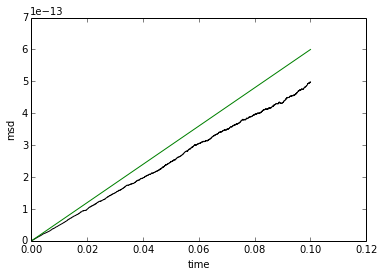

In [36]:
plt.plot(t,msd,"k-") #plot graph
p=np.polyfit(t,msd,1) #fit using linear eqtn
print p
plt.plot(t,6*Dc*t,'g-')  #theoretical line
plt.xlabel("time")
plt.ylabel("msd")
print("D=%s" %[p[0]/6])